# 05과 실전 단변량분석 : 종합실습

* 고객사는 카시트를 판매하는 회사 입니다.
* 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
    * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
    * 너무 국내 시장에 집중됨.
    * 지역마다의 구매력을 제대로 파악하지 못하고 있음.

* 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.
* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
* 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
* 드디어 AIVLE 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
* 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


**단변량 분석 할 때 확인해야 할 점들**

* 개별 변수의 분포로 부터…
    * 값의 범위 확인
    * 데이터가 모여 있는 구간(혹은 범주)와 희박한 구간(혹은 범주) 확인
    * 이상치 확인 및 조치 방안
    * 결측치 확인 및 조치 방안
    * 가변수화, 스케일링 대상 선별

* 비즈니스의 일반 사항과 특이사항을 도출
    * 추가 분석 대상 도출.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings   
warnings.filterwarnings("ignore")  # 향후 버전에서 제외될 수 있다는 경고 메시지 감추기

## 카시트 판매량 데이터

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(Yes,No)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(Yes,No)	|	feature	|


In [2]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop('Education', axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


### ① Sales (Target) 

1) 변수의 비즈니스 의미

In [ ]:
각 지역 판매량(단위 1000개)

2) 숫자, 범주?

In [ ]:
숫자

3) NaN 존재 유무 및 조치방안

In [7]:
data['Sales'].isnull().sum()

0

4) 가변수화 필요 여부

In [ ]:
숫자형이므로 필요 X

5) 기초통계량(수치화)

In [8]:
data['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

6) 분포 확인(시각화)

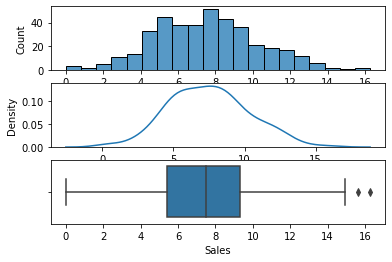

In [19]:
plt.subplot(3,1,1)
sns.histplot(data["Sales"],bins=20)
plt.subplot(3,1,2)
sns.kdeplot(data['Sales'])
plt.subplot(3,1,3)
sns.boxplot(data['Sales'])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

8) 추가 분석해 볼 사항이 있나요?

### ② CompPrice

In [20]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000


1) 변수의 비즈니스 의미

In [ ]:
경쟁사 가격 (달러 단위)

2) 숫자, 범주?

In [ ]:
숫자형

3) NaN 존재 유무 및 조치방안

In [22]:
data['CompPrice'].isnull().sum()

0

4) 가변수화 필요 여부

In [ ]:
숫자형이므로 필요없음

5) 기초통계량(수치화)

In [29]:
data['CompPrice'].describe()

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

6) 분포 확인(시각화)

In [ ]:
plt.subplot(3,1,1)
plt.plot(data['CompPrice'])
plt.subplot(3,1,2)
sns.kdeplot(data['CompPrice'])
plt.subplot(3,1,3)
plt.boxplot(data['CompPrice'],vert = False)
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

8) 추가 분석해 볼 사항이 있나요?

### ③ Income

In [3]:
var = 'Income'

1) 변수의 비즈니스 의미

* 지역 평균 소득(단위 : 1000달러)

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무 및 조치방안

In [4]:
data[var].isna().sum()

0

* NAN 없음

4) 가변수화 필요 여부

* 숫자형이므로 필요 없음

5) 기초통계량(수치화)

In [5]:
data[var].describe()

count    400.000000
mean      68.657500
std       27.986037
min       21.000000
25%       42.750000
50%       69.000000
75%       91.000000
max      120.000000
Name: Income, dtype: float64

6) 분포 확인(시각화)

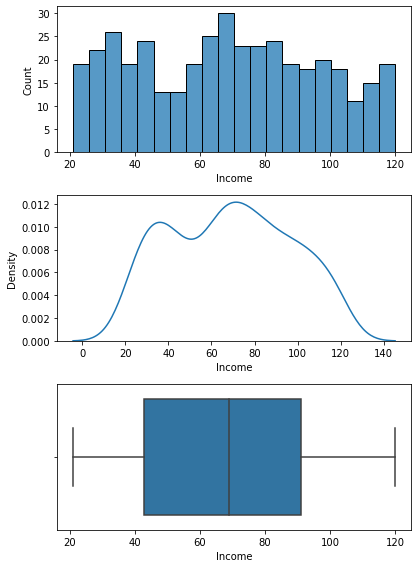

In [6]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[var], bins = 20)

plt.subplot(3,1,2)
sns.kdeplot(data[var])

plt.subplot(3,1,3)
sns.boxplot(data[var])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 전 연령에 대한 인구별 평균 소득액? 성인에 대한 평균 소득액?
* 2만달러 ~ 12만 달러 이므로 연간 소득일 것.
* 50%가 약 4만달러 ~ 9만달러

8) 추가 분석해 볼 사항이 있나요?

* 평균 소득과 카시트 판매량과의 관계
* 평균 소득과 카시트 가격과의 관계

### ④ Advertising

In [ ]:
var ='Advertising'

1) 변수의 비즈니스 의미

In [ ]:
각 지역,회사의 광고예산

2) 숫자, 범주?

In [ ]:
숫자

3) NaN 존재 유무 및 조치방안

In [3]:
data['Advertising'].isna().sum()

0

4) 가변수화 필요 여부

In [ ]:
필요없음

5) 기초통계량(수치화)

In [4]:
data['Advertising'].describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

6) 분포 확인(시각화)

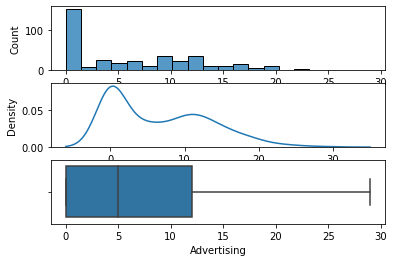

In [7]:
plt.subplot(3,1,1)
sns.histplot(data['Advertising'],bins=20)
plt.subplot(3,1,2)
sns.kdeplot(data['Advertising'])
plt.subplot(3,1,3)
sns.boxplot(data['Advertising'])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

8) 추가 분석해 볼 사항이 있나요?

### ⑤ Population

In [10]:
data['Population'].describe()

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

1) 변수의 비즈니스 의미

In [ ]:
지역 인구수 단위 1000명

2) 숫자, 범주?

In [ ]:
숫자

3) NaN 존재 유무 및 조치방안

In [11]:
data['Population'].isna().sum()

0

4) 가변수화 필요 여부

In [ ]:
필요없음

5) 기초통계량(수치화)

In [12]:
data['Population'].describe()

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

6) 분포 확인(시각화)

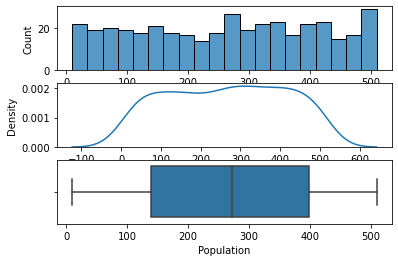

In [13]:
plt.subplot(3,1,1)
sns.histplot(data['Population'],bins=20)
plt.subplot(3,1,2)
sns.kdeplot(data["Population"])
plt.subplot(3,1,3)
sns.boxplot(data['Population'])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

8) 추가 분석해 볼 사항이 있나요?

### ⑥ Price

1) 변수의 비즈니스 의미

In [ ]:
자사 판매지역 가격

2) 숫자, 범주?

In [ ]:
숫자

3) NaN 존재 유무 및 조치방안

In [20]:
data['Price'].isna().sum()

0

4) 가변수화 필요 여부

In [ ]:
없음

5) 기초통계량(수치화)

In [21]:
data['Price'].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

6) 분포 확인(시각화)

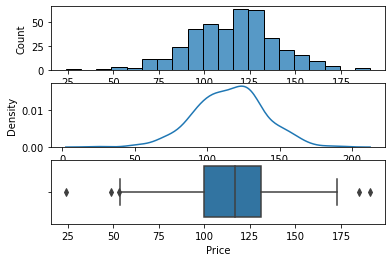

In [22]:
plt.subplot(3,1,1)
sns.histplot(data['Price'],bins=20)
plt.subplot(3,1,2)
sns.kdeplot(data["Price"])
plt.subplot(3,1,3)
sns.boxplot(data['Price'])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

8) 추가 분석해 볼 사항이 있나요?

In [ ]:
# comprice와의 비교

### ⑦ ShelveLoc

In [30]:
data['ShelveLoc']

0         Bad
1        Good
2      Medium
3      Medium
4         Bad
        ...  
395      Good
396    Medium
397    Medium
398       Bad
399      Good
Name: ShelveLoc, Length: 400, dtype: object

1) 변수의 비즈니스 의미

In [ ]:
진열상태

2) 숫자, 범주?

In [ ]:
범주형

3) NaN 존재 유무 및 조치방안

In [31]:
data['ShelveLoc'].isnull().sum()

0

4) 가변수화 필요 여부

In [ ]:
필요함

5) 기초통계량(수치화)

In [33]:
data['ShelveLoc'].describe()

count        400
unique         3
top       Medium
freq         219
Name: ShelveLoc, dtype: object

6) 분포 확인(시각화)

In [40]:
temp = data['ShelveLoc'].value_counts()
print(temp.index,temp.values)

Index(['Medium', 'Bad', 'Good'], dtype='object') [219  96  85]


In [44]:
temp = data['ShelveLoc'].value_counts()
plt.bar(temp.index,temp.values)
plt.show()

TypeError: 'tuple' object is not callable

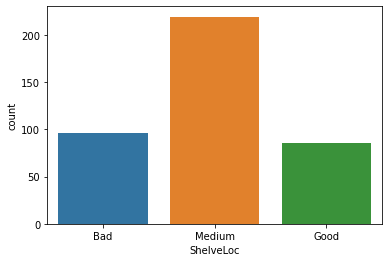

In [70]:
sns.countplot(data['ShelveLoc'],order=['Bad','Medium','Good'])
plt.show()

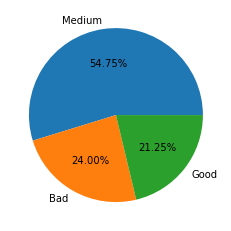

In [41]:
plt.pie(temp.values,labels=temp.index, autopct='%.2f%%')
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

8) 추가 분석해 볼 사항이 있나요?

### ⑧ Age

In [51]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000


1) 변수의 비즈니스 의미

In [ ]:
나이

2) 숫자, 범주?

In [ ]:
숫자

3) NaN 존재 유무 및 조치방안

In [52]:
data['Age'].isnull().sum()

0

4) 가변수화 필요 여부

In [ ]:
없음

5) 기초통계량(수치화)

In [53]:
data['Age'].describe()

count    400.000000
mean      53.322500
std       16.200297
min       25.000000
25%       39.750000
50%       54.500000
75%       66.000000
max       80.000000
Name: Age, dtype: float64

6) 분포 확인(시각화)

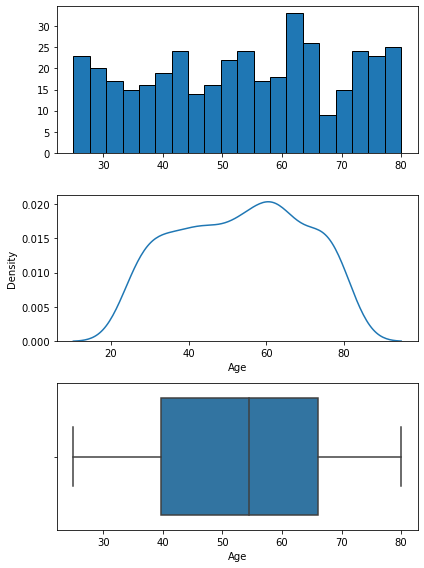

In [68]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
plt.hist(data['Age'],bins=20,edgecolor='black')
plt.subplot(3,1,2)
sns.kdeplot(data['Age'])
plt.subplot(3,1,3)
sns.boxplot(data['Age'])
plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

8) 추가 분석해 볼 사항이 있나요?

### ⑨ Urban

In [69]:
data['Urban'].unique()

array(['Yes', 'No'], dtype=object)

1) 변수의 비즈니스 의미

In [ ]:
도심 지역 여부(Yes,No)

2) 숫자, 범주?

In [ ]:
범주

3) NaN 존재 유무 및 조치방안

In [45]:
data['Urban'].isnull().sum()

0

4) 가변수화 필요 여부

In [ ]:
필요

5) 기초통계량(수치화)

In [46]:
data['Urban'].describe()

count     400
unique      2
top       Yes
freq      282
Name: Urban, dtype: object

6) 분포 확인(시각화)

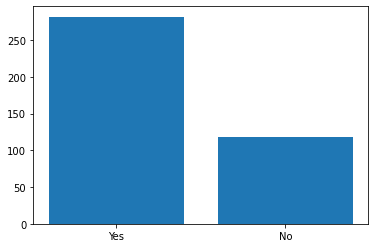

In [15]:
temp = data['Urban'].value_counts()
plt.bar(temp.index,temp.values)
plt.show()

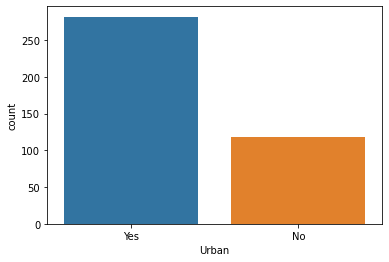

In [49]:
# order 순서지정
sns.countplot(data['Urban'],order=['Yes','No'])
plt.show()

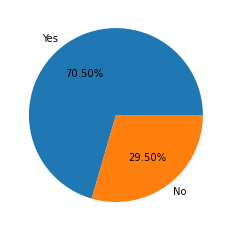

In [50]:
plt.pie(temp.values,labels = temp.index,autopct='%.2f%%')
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [71]:
# 70프로 매장이 도심에 있음

8) 추가 분석해 볼 사항이 있나요?

### ⑩ US

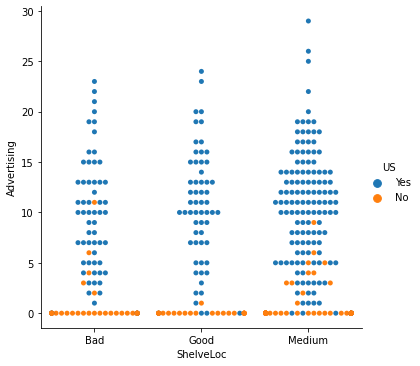

In [73]:
sns.catplot(data=data, kind = "swarm", x="ShelveLoc", y="Advertising", hue="US")
plt.show()

1) 변수의 비즈니스 의미

In [ ]:
매장이 미국에 있는지 여부

2) 숫자, 범주?

In [ ]:
범주

3) NaN 존재 유무 및 조치방안

In [16]:
data['US'].isna().sum()

0

4) 가변수화 필요 여부

In [ ]:
필요 X (이미 가변수화)

5) 기초통계량(수치화)

In [17]:
data['US'].describe()

count     400
unique      2
top       Yes
freq      258
Name: US, dtype: object

6) 분포 확인(시각화)

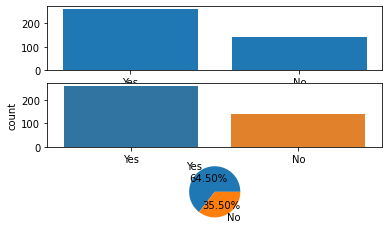

In [19]:
temp = data['US'].value_counts()
plt.subplot(3,1,1)
plt.bar(temp.index,temp.values)
plt.subplot(3,1,2)
sns.countplot(data['US'])
plt.subplot(3,1,3)
plt.pie(temp.values,labels=temp.index,autopct="%.2f%%")
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

8) 추가 분석해 볼 사항이 있나요?